In [355]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [445]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [446]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [447]:
churnData['StreamingMovies'].isnull().values.any()

False

In [448]:
churnData['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [449]:
churnData['TotalCharges'].isnull().values.any()

False

In [450]:
rep = lambda x: x.replace('" "',' ') if x=='" "' else x
churnData['TotalCharges'] = churnData['TotalCharges'].apply(rep)

In [451]:
churnData['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [452]:
churnData['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [453]:
churnData['TotalCharges'] = churnData['TotalCharges'].str.replace(' ','')
churnData['TotalCharges']=churnData['TotalCharges'].apply(pd.to_numeric)

In [454]:
churnData.isnull().values.any()

True

In [455]:
#churnData['TotalCharges']=churnData['TotalCharges'].dropna()
#churnData
churnData['TotalCharges']=churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges: 

In [14]:
churn=churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges','Churn']]
churn

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


In [15]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
churn['Churn']= churn['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\User\AppData\Local\Temp\ipykernel_56208\2312681987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Churn']= churn['Churn'].map({'Yes': 1, 'No': 0})


In [17]:
churn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [18]:
#def churn_clean(x):
    #if x in ['No']:
        #return '0'
    #else:
        #return '1'

In [19]:
#churn['Churn'] = list(map(churn_clean,churn['Churn'])) 


In [20]:
churnData['TotalCharges'].isnull().values.any()

False

In [21]:
churnData['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

Scale the features either by using normalizer or a standard scaler

In [22]:
# define X and y (features and target)
X = churn.drop(columns=["Churn"], axis = 1)
y = churn["Churn"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [24]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [25]:
X_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
2142,21,0,64.85,1336.800000
1623,54,0,97.20,5129.450000
6074,1,0,23.45,23.450000
1362,4,0,70.20,237.950000
6754,0,0,61.90,2283.300441
...,...,...,...,...
3772,1,0,95.00,95.000000
5191,23,0,91.10,2198.300000
5226,12,0,21.15,306.050000
5390,12,1,99.45,1200.150000


In [26]:
X_test_scaled=std_scaler.transform(X_test)

In [27]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

#trans = PowerTransformer()
#model = LinearRegression()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
#trans.fit(X_train)

#X_train = trans.transform(X_train)
#X_test  = trans.transform(X_test)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
#model.fit(X_train_scaled, y_train)

#y_pred_train_lm = model.predict(X_train_scaled)
#y_pred_test_lm  = model.predict(X_test)

## KNN

In [28]:
# initialize model (set parameters)



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree


neigh = KNeighborsClassifier(n_neighbors=5) # n_neighbors = K
log_model = LogisticRegression() 

neigh.fit(X_train_scaled, y_train) # Minkowski distance with p = 2 -> Euclidean distance
log_model.fit(X_train_scaled, y_train)

#trans = PowerTransformer()

#trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)



LogisticRegression()

In [30]:
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

y_pred_train_knn = neigh.predict(X_train_scaled)
y_pred_test_knn = neigh.predict(X_test_scaled)


In [31]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


In [32]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)


,Error_metric,Train,Test
0,Accuracy,0.836706,0.776437
1,Precision,0.739203,0.593548
2,Recall,0.594920,0.493298


Confusion matrix for the train set
[[3774  364]
 [ 833  663]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


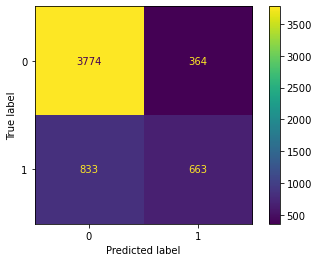



Confusion matrix for the test set
[[959  77]
 [194 179]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


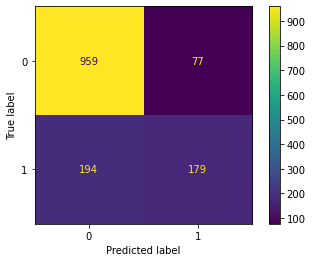

In [33]:

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [ ]:
temp = pd.DataFrame({({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})

In [63]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [68]:
full = pd.DataFrame()
models = {'k': [] }
for k in range(2,21):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    models['k'] = [k, neigh]
    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)
    performance_knn, _, _ = evaluate_classification_model(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'],
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)
full

,k,Error_metric,Train,Test
0,2,Accuracy,0.85,0.78
1,2,Precision,0.99,0.67
2,2,Recall,0.46,0.29
0,3,Accuracy,0.86,0.77
1,3,Precision,0.77,0.58
2,3,Recall,0.65,0.49
0,4,Accuracy,0.83,0.78
1,4,Precision,0.83,0.67
2,4,Recall,0.44,0.37
0,5,Accuracy,0.83,0.78


Round 2

    Fit a Decision Tree Classifier on the training data.
    Check the accuracy on the test data.


In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   OnlineSecurity    4420 non-null   float64
 7   OnlineBackup      4420 non-null   float64
 8   DeviceProtection  4420 non-null   float64
 9   TechSupport       4420 non-null   float64
 10  StreamingTV       4420 non-null   float64
 11  StreamingMovies   4420 non-null   float64
 12  Contract          5634 non-null   int64  
 13  MonthlyCharges    5634 non-null   float64
 14  TotalCharges      5634 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 704.2 KB


In [36]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

,Error_metric,Train,Test
0,Accuracy,0.786120,0.791341
1,Precision,0.619556,0.625397
2,Recall,0.504011,0.528150


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


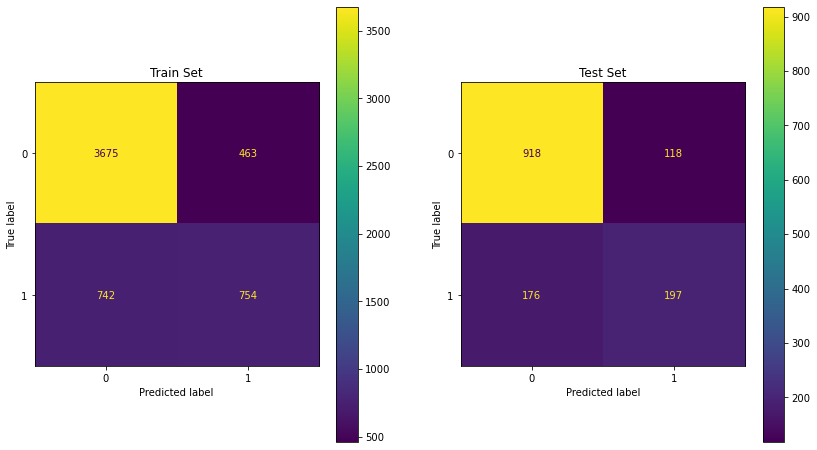

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Feature importance

<BarContainer object of 4 artists>

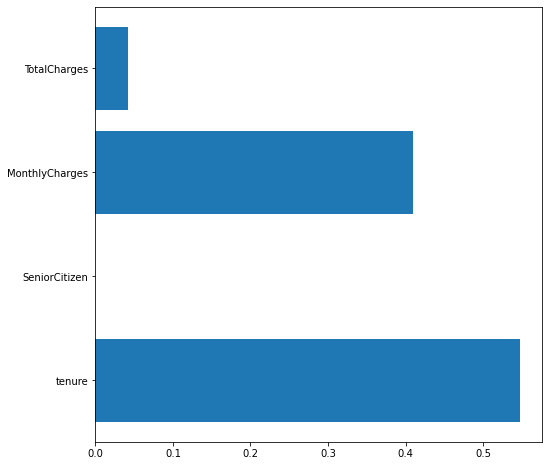

In [45]:
plt.figure(figsize=(8,8))
plt.barh(X.columns,model.feature_importances_)

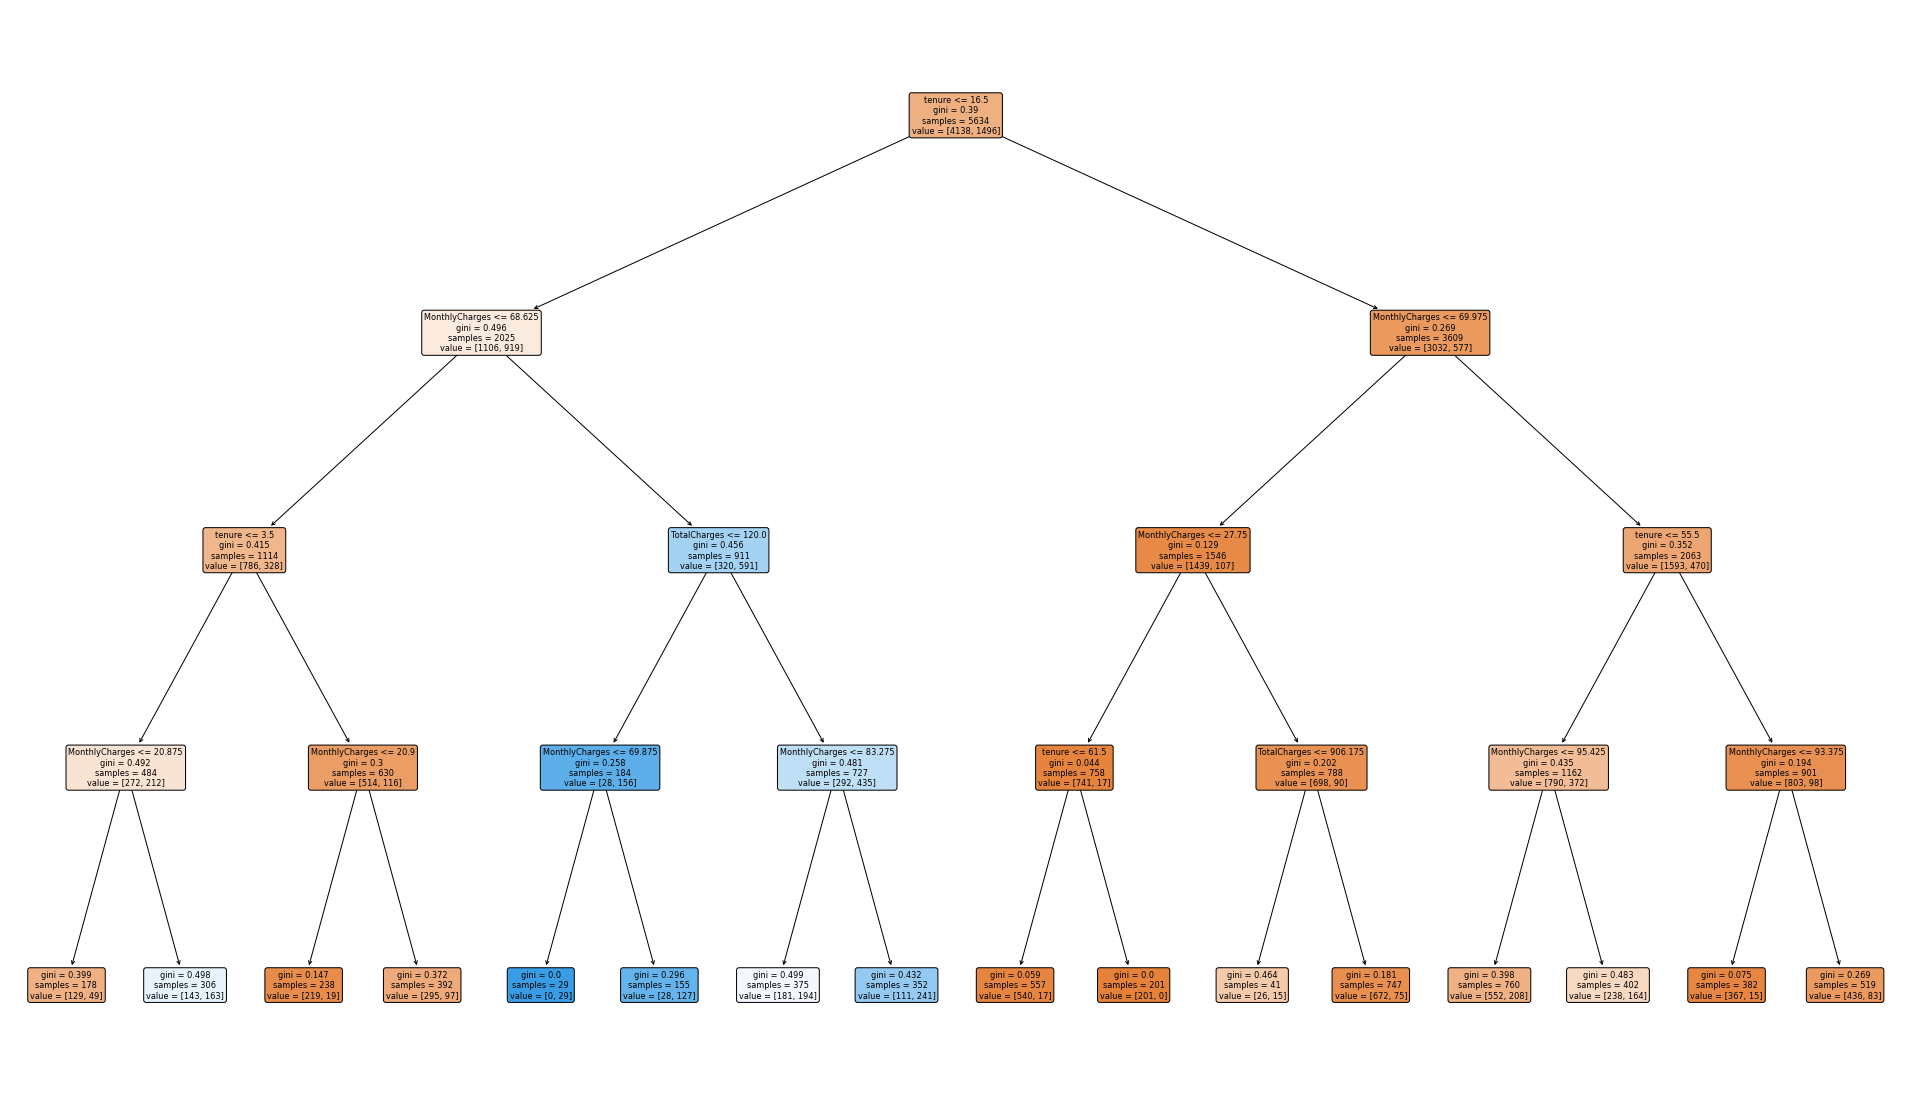

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [415]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [416]:
#churnData['Churn']= churnData['Churn'].map({'Yes': 1, 'No': 0})

In [427]:
churnData= pd.get_dummies(data = churnData,columns=['StreamingMovies'],drop_first=True)


In [428]:
churnData['gender']=churnData['gender'].map({'Female': 1, 'Male': 0})

In [429]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,MonthlyCharges,TotalCharges,Churn,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,0,0.00,1.00,0.00,0.00,0.00,Month-to-month,29.85,29.85,0,0,0
1,0,0,0,0,34,1,1.00,0.00,1.00,0.00,0.00,One year,56.95,1889.50,0,0,0
2,0,0,0,0,2,1,1.00,1.00,0.00,0.00,0.00,Month-to-month,53.85,108.15,1,0,0
3,0,0,0,0,45,0,1.00,0.00,1.00,1.00,0.00,One year,42.30,1840.75,0,0,0
4,1,0,0,0,2,1,0.00,0.00,0.00,0.00,0.00,Month-to-month,70.70,151.65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.00,0.00,1.00,1.00,1.00,One year,84.80,1990.50,0,0,1
7039,1,0,1,1,72,1,0.00,1.00,1.00,0.00,1.00,One year,103.20,7362.90,0,0,1
7040,1,0,1,1,11,0,1.00,0.00,0.00,0.00,0.00,Month-to-month,29.60,346.45,0,0,0
7041,0,1,1,0,4,1,0.00,0.00,0.00,0.00,0.00,Month-to-month,74.40,306.60,1,0,0


In [430]:
churnData['Contract']=churnData['Contract'].map({'Month-to-month': 0, 'One year': 1,'Two year': 2})

In [442]:
churnData['StreamingMovies_Yes'].isnull().values.any()

False

In [443]:
np.all(np.isfinite(churnData['StreamingMovies_Yes']))

True

In [444]:
churnData['StreamingMovies_Yes'].value_counts()

0    4311
1    2732
Name: StreamingMovies_Yes, dtype: int64

In [456]:
churnD=pd.get_dummies(churnData.select_dtypes('object'),drop_first=True)

In [457]:
churnD

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [462]:
final_df=pd.concat([churnD,churn],axis=1)
final_df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,34,0,56.95,1889.50,0
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,0,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,45,0,42.30,1840.75,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,2,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,0,1,1,0,0,24,0,84.80,1990.50,0
7039,0,1,1,1,0,0,0,1,0,1,...,0,1,1,0,0,72,0,103.20,7362.90,0
7040,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,11,0,29.60,346.45,0
7041,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,4,1,74.40,306.60,1


In [467]:
# define X and y (features and target)
X = final_df.drop(columns=["Churn_Yes","Churn"], axis = 1)
y = final_df["Churn_Yes"]

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.66
2,Recall,0.48,0.49


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


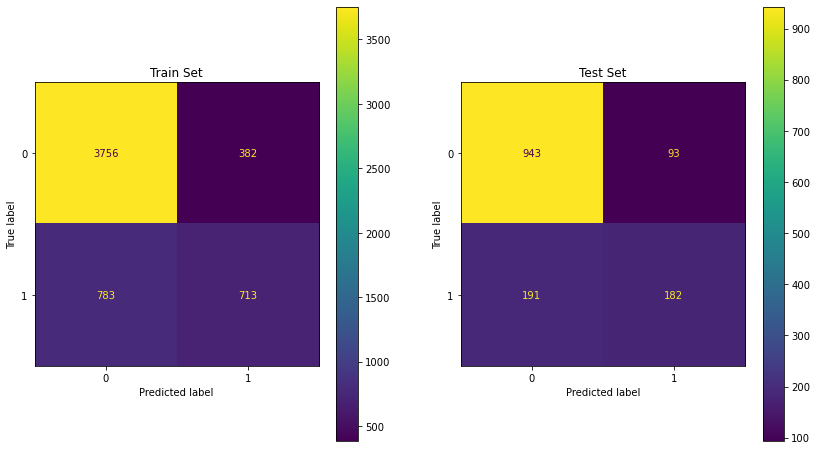

In [469]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<BarContainer object of 22 artists>

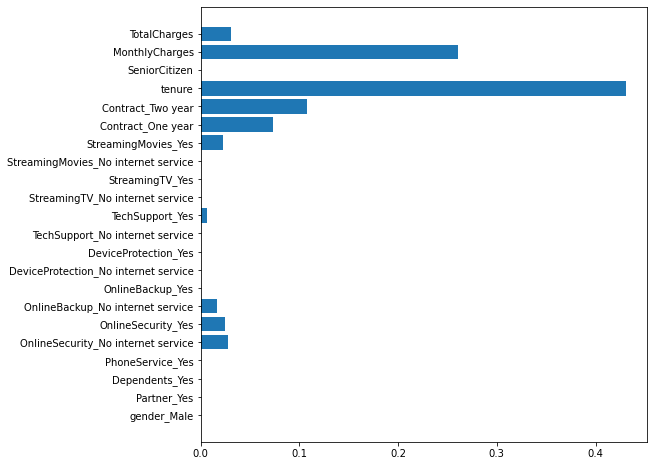

In [470]:
plt.figure(figsize=(8,8))
plt.barh(X.columns,model.feature_importances_)

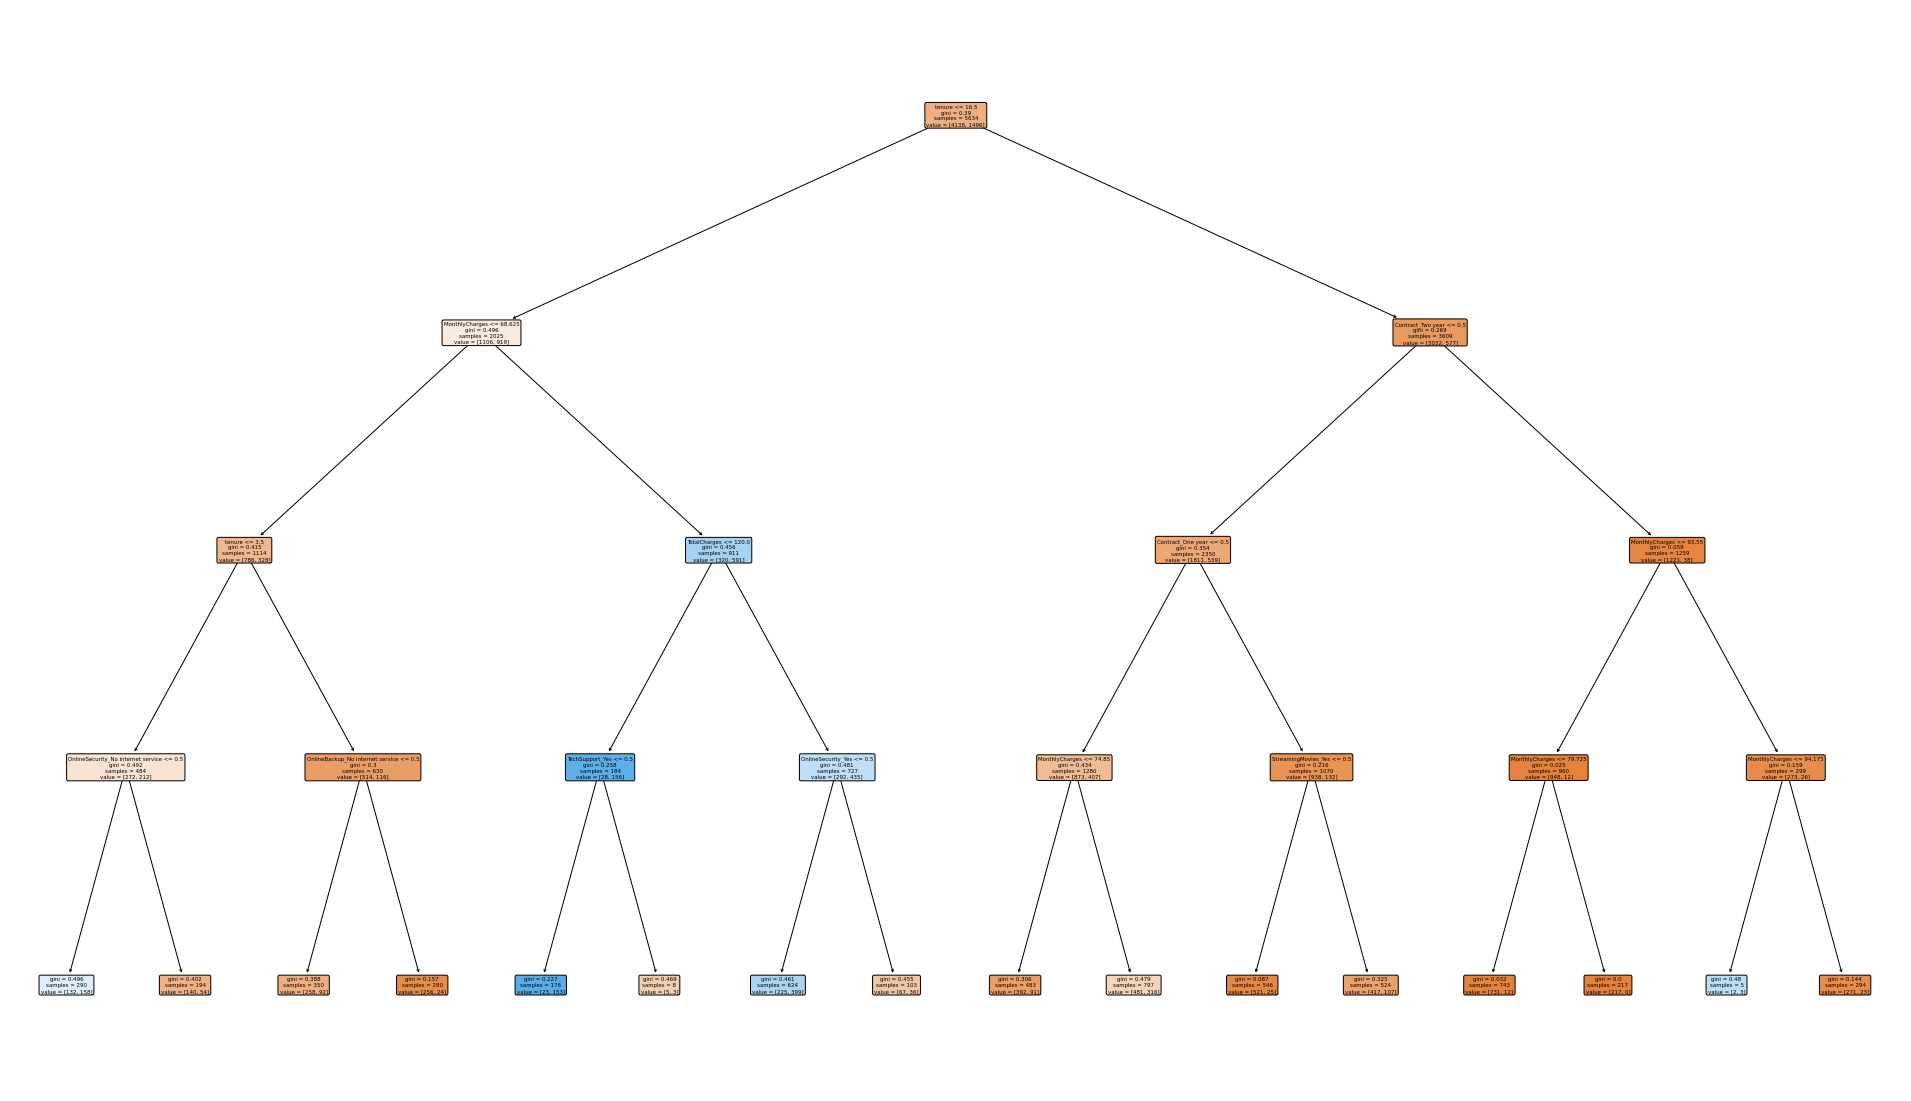

In [471]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 